In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
phat_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phat_MH_catalog.csv')
phast_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_phast_MH_catalog.csv')

In [4]:
phast_df.columns

Index(['Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr', 'f475w_crowd',
       'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr', 'f814w_crowd',
       'f814w_sharp', 'f814w_flag', 'f814w_vega_ecorr', 'f475w_vega_ecorr',
       'f475w-f814w_ecorr', 'f475w-f814w_vega', 'f475w_vega-f814w_vega',
       'interpolated_MH', 'interpolated_Mini', 'interpolated_int_IMF',
       'interpolated_Mass', 'interpolated_logL', 'interpolated_logTe',
       'interpolated_logg'],
      dtype='object')

In [5]:
phat_df.columns

Index(['Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr', 'f475w_crowd',
       'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr', 'f814w_crowd',
       'f814w_sharp', 'f814w_flag', 'f814w_vega_ecorr', 'f475w_vega_ecorr',
       'f475w-f814w_ecorr', 'f475w_vega-f814w_vega', 'interpolated_MH',
       'interpolated_Mini', 'interpolated_int_IMF', 'interpolated_Mass',
       'interpolated_logL', 'interpolated_logTe', 'interpolated_logg'],
      dtype='object')

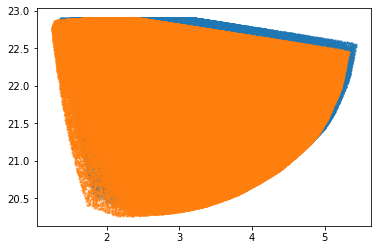

In [6]:
plt.scatter(phast_df['f475w-f814w_vega'], phast_df['f814w_vega'], s=1, alpha=0.5, label='PHAST')
plt.scatter(phat_df['f475w_vega-f814w_vega'], phat_df['f814w_vega'], s=1, alpha=0.5, label='PHAT')

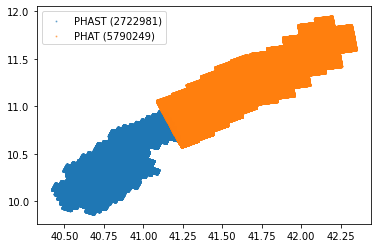

In [7]:
plt.scatter(phast_df['dec'], phast_df['ra'], s=1, alpha=0.5, label=f'PHAST ({len(phast_df)})')
plt.scatter(phat_df['dec'], phat_df['ra'], s=1, alpha=0.5, label=f'PHAT ({len(phat_df)})')
plt.legend()

<AxesSubplot:xlabel='f475w-f814w_vega', ylabel='f814w_vega'>

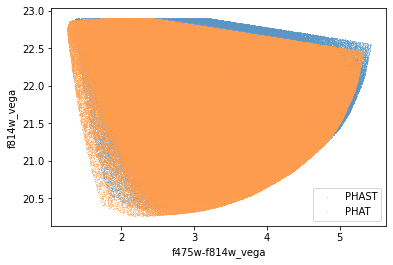

In [8]:
import seaborn as sns

sns.scatterplot(data=phast_df, x='f475w-f814w_vega', y='f814w_vega', s=1, alpha=0.5, label='PHAST')
sns.scatterplot(data=phat_df, x='f475w_vega-f814w_vega', y='f814w_vega', s=1, alpha=0.5, label='PHAT')


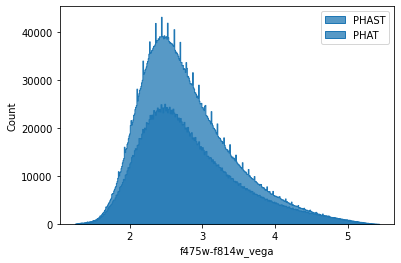

In [9]:
sns.histplot(data=phast_df['f475w-f814w_vega'], kde=False, stat='count', element='step', label='PHAST')
sns.histplot(data=phat_df['f475w_vega-f814w_vega'], kde=False, stat='count', element='step', label='PHAT')
plt.xlabel('f475w-f814w_vega')
plt.ylabel('Count')
plt.legend()

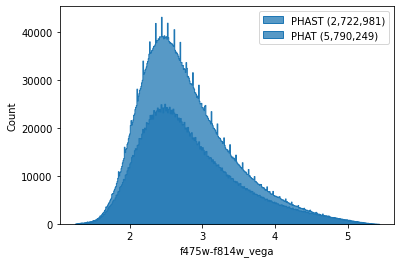

In [10]:
import seaborn as sns
phast_above_7color_df = phast_df.loc[phast_df['f475w-f814w_vega'] <= 7]
phat_above_7color_df = phat_df.loc[phat_df['f475w_vega-f814w_vega'] <= 7]

phast_label = f'PHAST ({len(phast_above_7color_df):,})'
phat_label = f'PHAT ({len(phat_above_7color_df):,})'

sns.histplot(data=phast_above_7color_df['f475w-f814w_vega'], kde=False, stat='count', element='step', label=phast_label)
sns.histplot(data=phat_above_7color_df['f475w_vega-f814w_vega'], kde=False, stat='count', element='step', label=phat_label)
plt.xlabel('f475w-f814w_vega')
plt.ylabel('Count')
plt.legend()


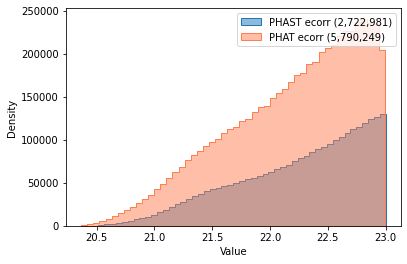

In [11]:
import seaborn as sns

sns.histplot(data=phast_df['f814w_vega_ecorr'], bins=50, stat='count', element='step', label=f'PHAST ecorr ({format(len(phast_df), ",")})', alpha=0.5)
sns.histplot(data=phat_df['f814w_vega_ecorr'], bins=50, stat='count', element='step', label=f'PHAT ecorr ({format(len(phat_df), ",")})', color='coral', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()



<AxesSubplot:xlabel='f475w-f814w_ecorr', ylabel='f814w_vega_ecorr'>

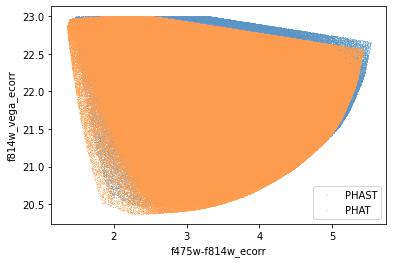

In [12]:
import seaborn as sns

sns.scatterplot(data=phast_df, x='f475w-f814w_ecorr', y='f814w_vega_ecorr', s=1, alpha=0.5, label='PHAST')
sns.scatterplot(data=phat_df, x='f475w-f814w_ecorr', y='f814w_vega_ecorr', s=1, alpha=0.5, label='PHAT')


In [13]:
# Project ra and dec to bin spatially

In [14]:
#  convert ra and dec to cartiisian coordinates
import astropy.units as u
from astropy.coordinates import SkyCoord

#convert ra and dec to cartiisian coordinates
phast_coords = SkyCoord(ra=phast_df['ra'], dec=phast_df['dec'], unit='deg')
phat_coords = SkyCoord(ra=phat_df['ra'], dec=phat_df['dec'], unit='deg')

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

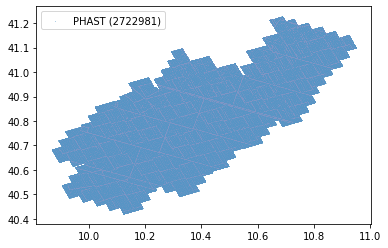

In [15]:
phast_ra = phast_coords.ra
phast_dec = phast_coords.dec
sns.scatterplot(phast_ra, phast_dec, s=1, alpha=0.5, label=f'PHAST ({len(phast_df)})')


/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

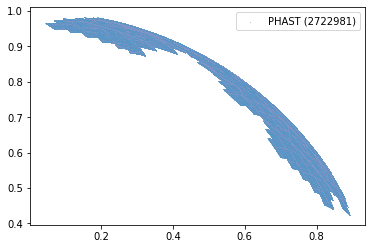

In [19]:
import numpy as np
m31_scale_factor = 0.067 #kpc

# Define the spherical coordinates
x_projected = np.cos(phast_df['dec']) * np.cos(phast_df['ra']) 
y_projected = np.cos(phast_df['dec']) * np.sin(phast_df['ra']) 
z_projected = np.sin(phast_df['dec']) 

sns.scatterplot(x_projected, y_projected, s=1, alpha=0.5, label=f'PHAST ({len(phast_df)})')

In [22]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# Function to create spatial bins and calculate median in each bin
def create_spatial_bins_and_median(ra, dec, values, bin_size_deg):
    # Convert RA and Dec to SkyCoord object
    coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

    # Define the grid boundaries based on the region of interest
    min_ra, max_ra = min(coords.ra.deg), max(coords.ra.deg)
    min_dec, max_dec = min(coords.dec.deg), max(coords.dec.deg)

    # Calculate the number of bins in each dimension
    num_bins_ra = int((max_ra - min_ra) / bin_size_deg) + 1
    num_bins_dec = int((max_dec - min_dec) / bin_size_deg) + 1

    # Create bins
    bins = [[[] for _ in range(num_bins_dec)] for _ in range(num_bins_ra)]
    bin_values = np.zeros((num_bins_ra, num_bins_dec), dtype=object)

    # Assign objects to bins and store values
    for i, (obj_coord, value) in enumerate(zip(coords, values)):
        ra_bin = int((obj_coord.ra.deg - min_ra) / bin_size_deg)
        dec_bin = int((obj_coord.dec.deg - min_dec) / bin_size_deg)
        bins[ra_bin][dec_bin].append(i)  # Store the index of the object
        bin_values[ra_bin][dec_bin] = np.append(bin_values[ra_bin][dec_bin], value)

    # Calculate median in each bin
    median_values = np.zeros((num_bins_ra, num_bins_dec))
    for i in range(num_bins_ra):
        for j in range(num_bins_dec):
            if bin_values[i][j].size > 0:
                median_values[i][j] = np.median(bin_values[i][j])

    return bins, median_values, min_ra, max_ra, min_dec, max_dec

# Example usage
ra_data = phast_df['ra']  # Replace with your RA data
dec_data = phast_df['dec']  # Replace with your Dec data
values_data = phast_df['interpolated_MH']  # Replace with your values data corresponding to each object
bin_size_deg = 0.01  # Choose your bin size in degrees

bins, median_values, min_ra, max_ra, min_dec, max_dec = create_spatial_bins_and_median(ra_data, dec_data, values_data, bin_size_deg)

import matplotlib.pyplot as plt

# Plot the bins and color code by median values
plt.imshow(median_values.T, origin='lower', extent=[min_ra, max_ra, min_dec, max_dec], cmap='viridis')
plt.colorbar(label='Median Values')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Spatial Binning')
plt.show()



KeyboardInterrupt: 

Importing necessary modules
Defining example usage variables
Calculating spatial bins and median values


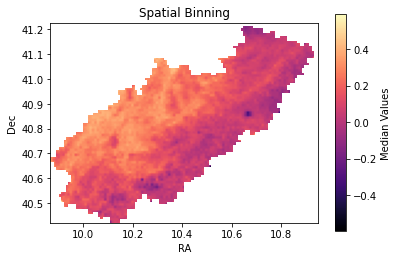

Plotting the bins and color coding by median values


In [25]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

print("Importing necessary modules")

# FILEPATH: /Users/mmckay/phd_projects/analysis_routine/code/phat_phast_analysis.ipynb
def create_spatial_bins_and_median_optimized(ra, dec, values, bin_size_deg):
    # Convert RA and Dec to SkyCoord object
    coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

    # Define the grid boundaries based on the region of interest
    min_ra, max_ra = min(coords.ra.deg), max(coords.ra.deg)
    min_dec, max_dec = min(coords.dec.deg), max(coords.dec.deg)

    # Calculate the number of bins in each dimension
    num_bins_ra = int((max_ra - min_ra) / bin_size_deg) + 1
    num_bins_dec = int((max_dec - min_dec) / bin_size_deg) + 1

    # Create bins using numpy.digitize
    ra_bins = np.digitize(coords.ra.deg, np.linspace(min_ra, max_ra, num_bins_ra))
    dec_bins = np.digitize(coords.dec.deg, np.linspace(min_dec, max_dec, num_bins_dec))

    # Calculate median values using numpy.bincount
    flat_indices = num_bins_dec * (ra_bins - 1) + dec_bins - 1
    bin_counts = np.bincount(flat_indices, minlength=num_bins_ra * num_bins_dec)
    bin_values = np.bincount(flat_indices, weights=values, minlength=num_bins_ra * num_bins_dec)

    # Avoid division by zero by setting zero counts to NaN
    bin_counts_nonzero = bin_counts.astype(float)
    bin_counts_nonzero[bin_counts_nonzero == 0] = np.nan

    # Calculate median values
    median_values = bin_values / bin_counts_nonzero
    median_values = median_values.reshape((num_bins_ra, num_bins_dec))

    return min_ra, max_ra, min_dec, max_dec, median_values

# Example usage
ra_data = phast_df['ra']  # Replace with your RA data
dec_data = phast_df['dec']  # Replace with your Dec data
values_data = phast_df['interpolated_MH']  # Replace with your values data corresponding to each object
bin_size_deg = 0.01  # Choose your bin size in degrees

print("Defining example usage variables")

min_ra, max_ra, min_dec, max_dec, median_values = create_spatial_bins_and_median_optimized(ra_data, dec_data, values_data, bin_size_deg)

print("Calculating spatial bins and median values")

# Plot the bins and color code by median values
plt.imshow(median_values.T, origin='lower', extent=[min_ra, max_ra, min_dec, max_dec], cmap='magma')
plt.colorbar(label='Median Values')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Spatial Binning')
plt.show()

print("Plotting the bins and color coding by median values")


Defining example usage variables
Calculating spatial bins and median values


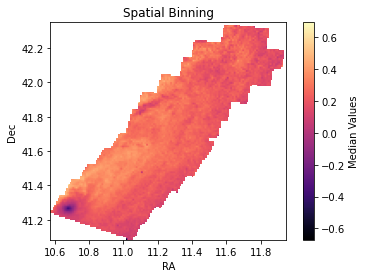

Plotting the bins and color coding by median values


In [26]:
ra_data = phat_df['ra']  # Replace with your RA data
dec_data = phat_df['dec']  # Replace with your Dec data
values_data = phat_df['interpolated_MH']  # Replace with your values data corresponding to each object
bin_size_deg = 0.01  # Choose your bin size in degrees

print("Defining example usage variables")

min_ra, max_ra, min_dec, max_dec, median_values = create_spatial_bins_and_median_optimized(ra_data, dec_data, values_data, bin_size_deg)

print("Calculating spatial bins and median values")

# Plot the bins and color code by median values
plt.imshow(median_values.T, origin='lower', extent=[min_ra, max_ra, min_dec, max_dec], cmap='magma')
plt.colorbar(label='Median Values')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Spatial Binning')
plt.show()

print("Plotting the bins and color coding by median values")

In [29]:
phat_ra_data = phat_df['ra']  # Replace with your RA data
phat_dec_data = phat_df['dec']  # Replace with your Dec data
phat_values_data = phat_df['interpolated_MH']  # Replace with your values data corresponding to each object
phat_bin_size_deg = 0.01  # Choose your bin size in degrees

phat_min_ra, phat_max_ra, phat_min_dec, phat_max_dec, phat_median_values = create_spatial_bins_and_median_optimized(phat_ra_data, phat_dec_data, phat_values_data, phat_bin_size_deg)


phast_ra_data = phast_df['ra']  # Replace with your RA data
phast_dec_data = phast_df['dec']  # Replace with your Dec data
phast_values_data = phast_df['interpolated_MH']  # Replace with your values data corresponding to each object
phast_bin_size_deg = 0.01  # Choose your bin size in degrees

phast_min_ra, phast_max_ra, phast_min_dec, phast_max_dec, phast_median_values = create_spatial_bins_and_median_optimized(phast_ra_data, phast_dec_data, phast_values_data, phast_bin_size_deg)


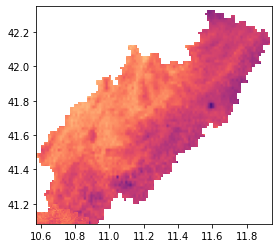

In [32]:
plt.imshow(phat_median_values.T, origin='lower', extent=[phast_min_ra, phast_max_ra, phast_min_dec, phast_max_dec], cmap='magma', label=f'PHAT {len(phat_median_values)}')
plt.imshow(phast_median_values.T, origin='lower', extent=[phat_min_ra, phat_max_ra, phat_min_dec, phat_max_dec], cmap='magma', label=f'PHAST {len(phast_median_values)}')
# plt.imshow(phat_median_values.T, origin='lower', extent=[phast_min_ra, phast_max_ra, phast_min_dec, phast_max_dec], cmap='magma', label=f'PHAT {len(phat_median_values)}')


In [37]:
len(phat_df.columns)

24

In [39]:
phast_df.columns

Index(['Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr', 'f475w_crowd',
       'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr', 'f814w_crowd',
       'f814w_sharp', 'f814w_flag', 'f814w_vega_ecorr', 'f475w_vega_ecorr',
       'f475w-f814w_ecorr', 'f475w-f814w_vega', 'f475w_vega-f814w_vega',
       'interpolated_MH', 'interpolated_Mini', 'interpolated_int_IMF',
       'interpolated_Mass', 'interpolated_logL', 'interpolated_logTe',
       'interpolated_logg'],
      dtype='object')

In [38]:
m31_df = pd.concat([phat_df, phast_df], axis=0, ignore_index=True)
m31_df = m31_df.drop(columns=set(phat_df.columns) ^ set(phast_df.columns))
m31_df.shape

(8513230, 24)

In [ ]:
# Bin MH spatially
m31_min_ra, m31_max_ra, m31_min_dec, m31_max_dec, m31_median_values = create_spatial_bins_and_median_optimized(m31_df.ra, m31_df.dec, m31_df.interpolated_MH, 0.01)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


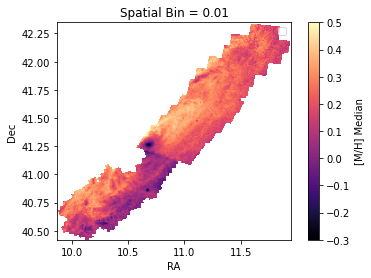

In [48]:
plt.imshow(m31_median_values.T, origin='lower', extent=[m31_min_ra, m31_max_ra, m31_min_dec, m31_max_dec], cmap='magma', vmin=-0.3, vmax=0.5, label=f'M31 {len(m31_median_values)}')
plt.colorbar(label='[M/H] Median')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title(f'Spatial Bin = {bin_size_deg}')
plt.legend()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_MH_spatial_bins.jpg', format='jpeg')
plt.show()

In [41]:
# m31_df.to_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/interpolated_m31_MH_catalog.csv', index=False)